In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from czid_visualization.amr import read_report, heatmap, util

%matplotlib inline

In [2]:
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
# Update this parameter (as needed) to specify your own input data filename.
# For most cases, leaving this as-is should be fine.

amr_results_file = 'example_data/combined_amr_results.csv'

In [4]:
METRIC = 'max_breadth'

MIN_NUM_CONTIGS = 0
CUTOFF_LIST = ['Strict', 'Perfect', 0]
MIN_CONTIG_COV = 0
MIN_CONTIG_PID = 0
MIN_NUM_READS = 0
MIN_READ_COV = 0
MIN_READ_DEPTH = 0
MIN_RPM = 0
MIN_DPM = 0
DRUG_CLASS_LIST = [] # example: ['aminoglycoside antibiotic', 'aminocoumarin antibiotic']

TOP_N = 10
LOG_TRANSFORM = False
FIGURE_SIZE = (10,15)

pd.set_option('display.max_rows', 5) # set the # of data table rows will be shown in the notebo

In [5]:
filtered_amr_df = read_report.read_amr_czid_report(
    amr_results_file, 
    num_contigs_cutoff = MIN_NUM_CONTIGS, 
    cutoff_list = CUTOFF_LIST,
    contig_cov_breadth_cutoff = MIN_CONTIG_COV,
    contig_percent_id_cutoff = MIN_CONTIG_PID,
    num_reads_cutoff = MIN_NUM_READS,
    read_coverage_breadth_cutoff = MIN_READ_COV,
    read_coverage_depth_cutoff = MIN_READ_DEPTH,
    rpm_cutoff = MIN_RPM,
    dpm_cutoff = MIN_DPM,
    drug_class_list = DRUG_CLASS_LIST,
    split_drug_class = True
)


filtered_amr_df

,gene_name,sample_name,gene_family,drug_class,resistance_mechanism,model_type,num_contigs,cutoff,contig_coverage_breadth,contig_percent_id,contig_species,num_reads,read_coverage_breadth,read_coverage_depth,read_species,total_reads,rpm,dpm,max_breadth
0,aads,OPS_009_UTAH_ESBL_DNA_3-6mo_S129_L002,ANT(6),aminoglycoside antibiotic,antibiotic inactivation,protein homolog,1,Perfect,99.6528,100.0,Unknown taxonomy (chromosome or plasmid),31.0,100.00,4.69,0,110405192,10.47,1.58,100.00
1,acrd,OPS_009_UTAH_ESBL_DNA_3-6mo_S129_L002,resistance-nodulation-cell division (RND) anti...,aminoglycoside antibiotic,antibiotic efflux,protein homolog,0,0,0.0000,0.0,0,3.0,13.90,0.10,0,110405192,1.01,0.03,13.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,teta(60),AMR_TR-DNA-NOVA042518_2-pre_S112,ATP-binding cassette (ABC) antibiotic efflux pump,tetracycline antibiotic,antibiotic efflux,protein homolog,0,0,0.0000,0.0,0,2.0,17.24,0.17,0,10000000,0.76,0.06,17.24
1602,teta(p),AMR_TR-DNA-NOVA042518_2-pre_S112,major facilitator superfamily (MFS) antibiotic...,tetracycline antibiotic,antibiotic efflux,protein homolog,0,0,0.0000,0.0,0,13.0,5.54,0.04,0,10000000,4.95,0.02,5.54


In [6]:
plot_data_by_genes = pd.pivot_table(filtered_amr_df, values=METRIC, index='gene_name', columns='sample_name')
plot_data_by_genes

sample_name,AMR_TR-DNA-NOVA042518_1-30d_S110,AMR_TR-DNA-NOVA042518_1-6mo_S111,AMR_TR-DNA-NOVA042518_1-pre_S108,AMR_TR-DNA-NOVA042518_1-pst_S109,AMR_TR-DNA-NOVA042518_2-6mo_S115,AMR_TR-DNA-NOVA042518_2-pre_S112,AMR_TR-DNA-NOVA042518_2-z30d_S113,AMR_TR-DNA-NOVA042518_2-zpst_S114,AMR_TR-DNA-NOVA1-03-pre_S54,AMR_TR-DNA-NOVA1-03-pst_S55,...,AMR_TR-DNA-NOVA1-08-pst_S72,AMR_TR-DNA-NOVA1-09-30d_S77,AMR_TR-DNA-NOVA1-09-6mo_S78,AMR_TR-DNA-NOVA1-09-zpre_S76,AMR_TR-DNA-NOVA1-09-zpst_S75,AMR_TR-DNA-NOVA1-10-30d_S81,AMR_TR-DNA-NOVA1-10-pre_S79,AMR_TR-DNA-NOVA1-10-pst_S80,OPS_009_UTAH_ESBL_DNA_3-30d_S128_L002,OPS_009_UTAH_ESBL_DNA_3-6mo_S129_L002
gene_name,,,,,,,,,,,,,,,,,,,,,
aac(3)-iid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.63,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.68,NaN,NaN
aac(3)-iv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.91,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yoji,NaN,NaN,NaN,15.21,NaN,NaN,15.27,33.39,NaN,79.01,...,2.74,NaN,NaN,NaN,27.8,NaN,NaN,49.64,NaN,NaN
yrc-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.48,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(62, 36)


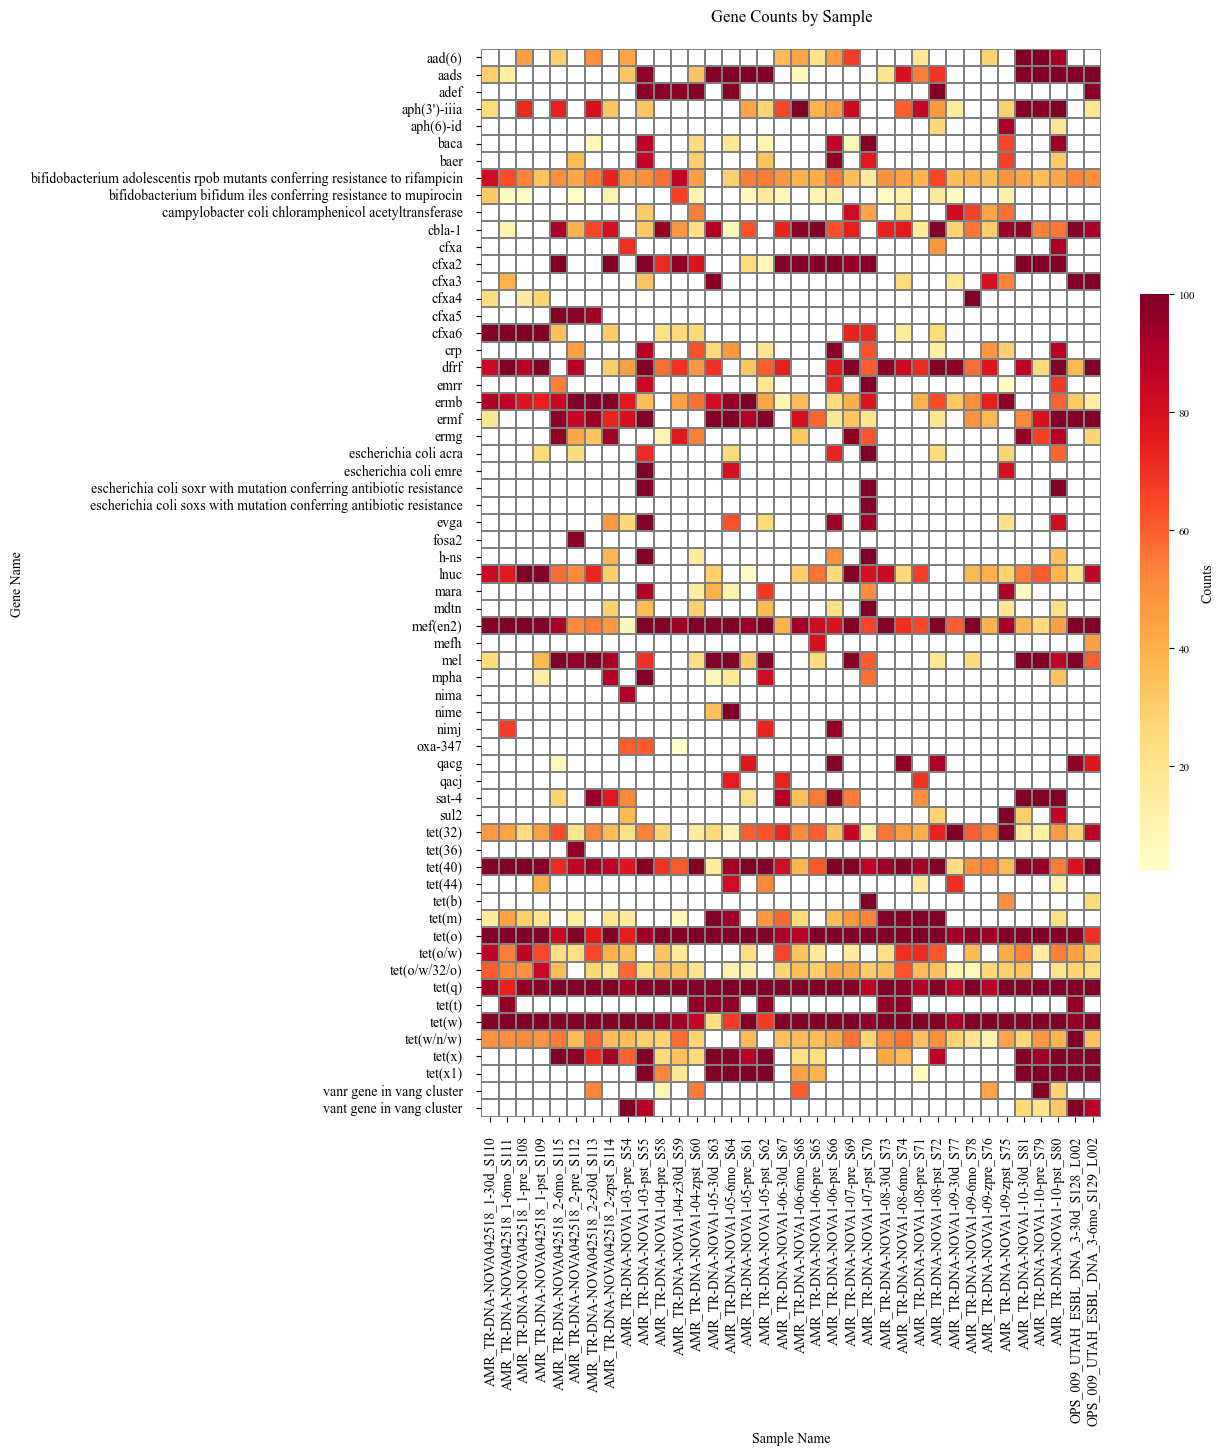

In [7]:
plt = heatmap.plot_czid_heatmap(
    plot_data_by_genes,
    title = "Gene Counts by Sample",
    legend_label="Counts",
    top_n = TOP_N, 
    sort_values = True, 
    figure_size = FIGURE_SIZE, 
    log = LOG_TRANSFORM, 
)
# plt.savefig(output_filename)
plt.show()

In [9]:
plot_data_by_drug_class = pd.pivot_table(
    util.format_drug_class(filtered_amr_df), 
    values='gene_name', 
    index='drug_class_split', 
    columns='sample_name', 
    aggfunc = 'count'
)
plot_data_by_drug_class

(1603, 19)
3084
(3084, 20)


sample_name,AMR_TR-DNA-NOVA042518_1-30d_S110,AMR_TR-DNA-NOVA042518_1-6mo_S111,AMR_TR-DNA-NOVA042518_1-pre_S108,AMR_TR-DNA-NOVA042518_1-pst_S109,AMR_TR-DNA-NOVA042518_2-6mo_S115,AMR_TR-DNA-NOVA042518_2-pre_S112,AMR_TR-DNA-NOVA042518_2-z30d_S113,AMR_TR-DNA-NOVA042518_2-zpst_S114,AMR_TR-DNA-NOVA1-03-pre_S54,AMR_TR-DNA-NOVA1-03-pst_S55,...,AMR_TR-DNA-NOVA1-08-pst_S72,AMR_TR-DNA-NOVA1-09-30d_S77,AMR_TR-DNA-NOVA1-09-6mo_S78,AMR_TR-DNA-NOVA1-09-zpre_S76,AMR_TR-DNA-NOVA1-09-zpst_S75,AMR_TR-DNA-NOVA1-10-30d_S81,AMR_TR-DNA-NOVA1-10-pre_S79,AMR_TR-DNA-NOVA1-10-pst_S80,OPS_009_UTAH_ESBL_DNA_3-30d_S128_L002,OPS_009_UTAH_ESBL_DNA_3-6mo_S129_L002
drug_class_split,,,,,,,,,,,,,,,,,,,,,
aminocoumarin antibiotic,1.0,NaN,NaN,3.0,NaN,7.0,1.0,4.0,NaN,8.0,...,3.0,NaN,NaN,NaN,7.0,NaN,1.0,7.0,NaN,NaN
aminoglycoside antibiotic,2.0,2.0,4.0,3.0,3.0,5.0,2.0,7.0,5.0,9.0,...,7.0,2.0,NaN,2.0,9.0,9.0,5.0,18.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sulfonamide antibiotic,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,...,1.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN
tetracycline antibiotic,13.0,16.0,13.0,22.0,12.0,22.0,13.0,20.0,17.0,29.0,...,21.0,9.0,9.0,10.0,23.0,16.0,16.0,28.0,17.0,20.0


(24, 36)


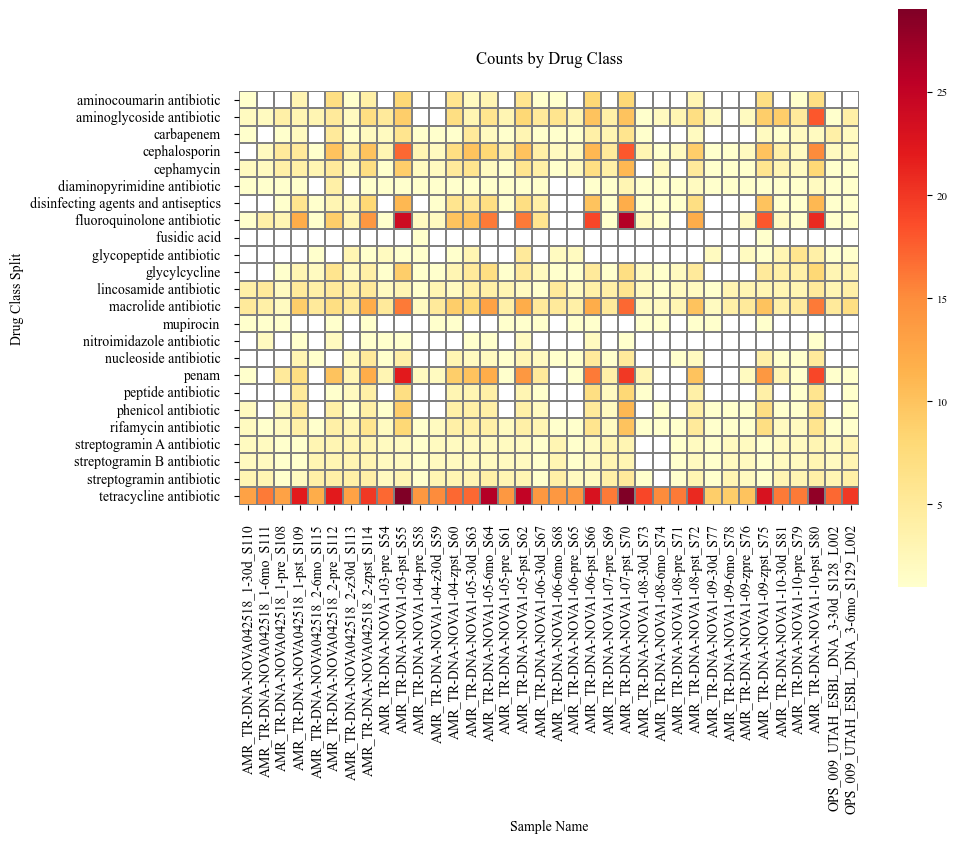

In [12]:
plt = heatmap.plot_czid_heatmap(
    plot_data_by_drug_class.loc[plot_data_by_drug_class.index.sort_values()],
    title="Counts by Drug Class",
    top_n = TOP_N, 
    sort_values = True, 
    figure_size = FIGURE_SIZE, 
    log = LOG_TRANSFORM, 

)

plt.show()